In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir ='/content/drive/MyDrive/Colab Notebooks/MangoLeafBD Dataset/MangoLeafBD Dataset'

In [7]:
import os
print(os.listdir(data_dir))

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [8]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
classes = os.listdir(data_dir)
images, labels = [], []
for label, class_name in enumerate(classes):
    class_folder = os.path.join(data_dir, class_name)
    for file in os.listdir(class_folder):
        img = cv2.imread(os.path.join(class_folder, file))
        img = cv2.resize(img, (128, 128))  # Resize for consistency
        images.append(img.flatten())  # Flattening for simplicity
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

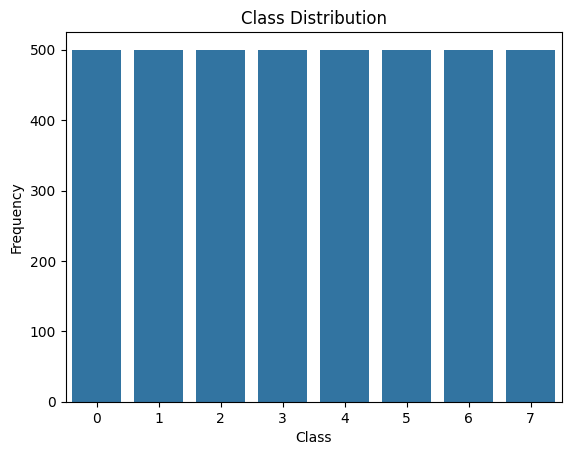

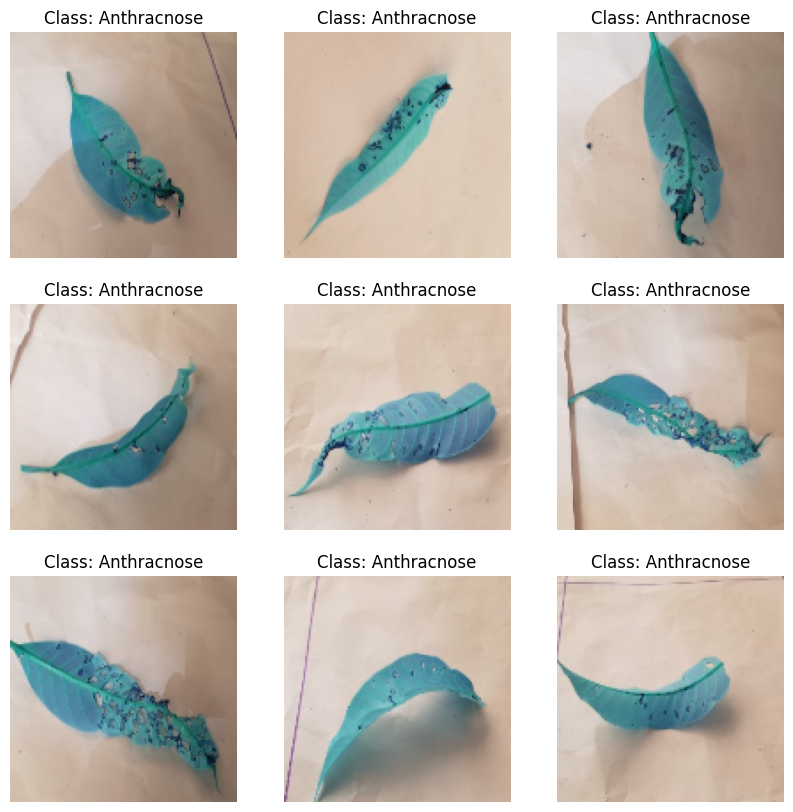

In [10]:
# Class distribution
class_counts = pd.Series(labels).value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Sample visualization
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(128, 128, 3).astype("uint8"))
    plt.title(f"Class: {classes[labels[i]]}")
    plt.axis("off")
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)


Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       167
           1       0.75      0.82      0.79       148
           2       0.94      0.94      0.94       158
           3       0.82      0.85      0.84       149
           4       0.53      0.52      0.52       159
           5       0.68      0.64      0.66       135
           6       0.62      0.65      0.64       134
           7       0.46      0.51      0.48       150

    accuracy                           0.69      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.69      0.69      0.69      1200

Accuracy: 0.69


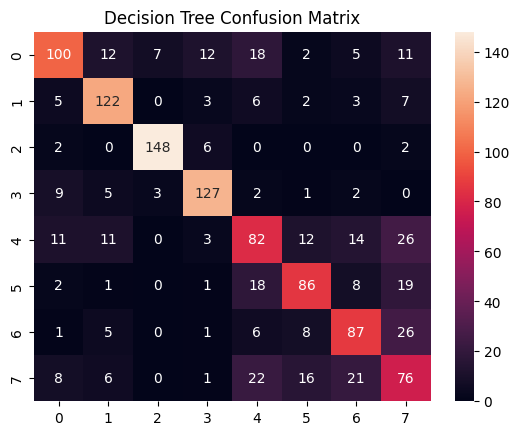

In [12]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()


Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       167
           1       0.89      0.92      0.91       148
           2       0.95      0.97      0.96       158
           3       0.97      0.89      0.93       149
           4       0.82      0.81      0.81       159
           5       0.80      0.84      0.82       135
           6       0.87      0.83      0.85       134
           7       0.79      0.78      0.78       150

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200

Accuracy: 0.8708333333333333


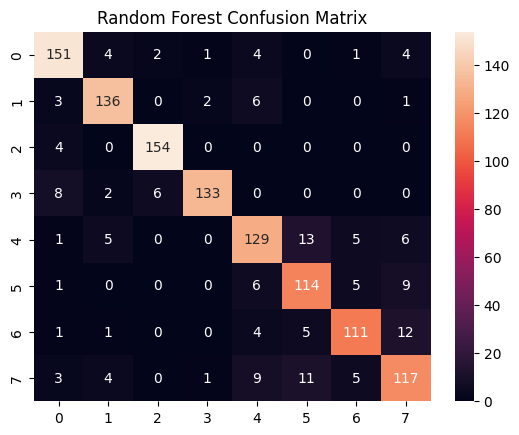

In [13]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average="weighted")
dt_recall = recall_score(y_test, y_pred_dt, average="weighted")
dt_f1 = f1_score(y_test, y_pred_dt, average="weighted")

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="weighted")
rf_recall = recall_score(y_test, y_pred_rf, average="weighted")
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted")

# Create a summary table
metrics_summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy],
    "Precision": [dt_precision, rf_precision],
    "Recall": [dt_recall, rf_recall],
    "F1 Score": [dt_f1, rf_f1]
})

print(metrics_summary)


           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.690000   0.692469  0.690000  0.689882
1  Random Forest  0.870833   0.871851  0.870833  0.870925


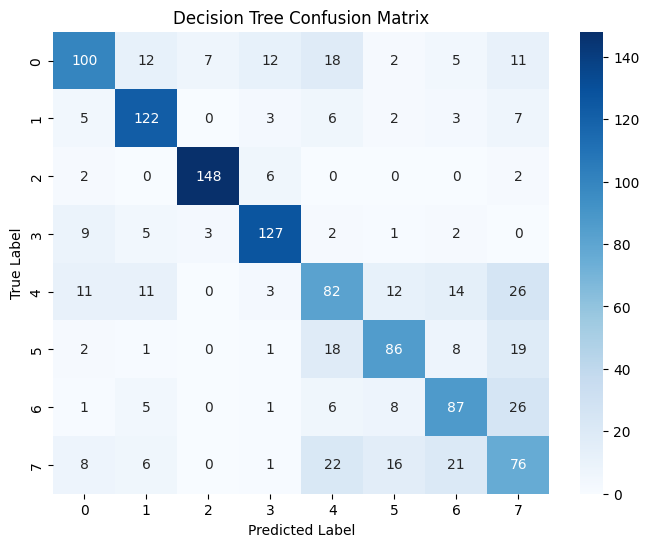

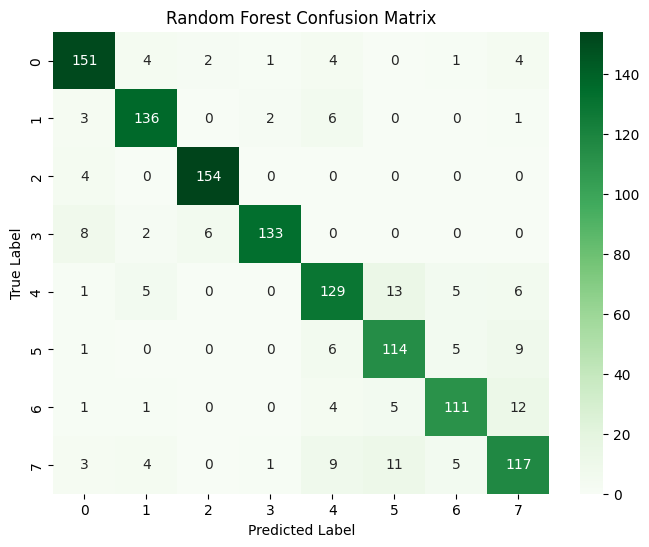

In [15]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
